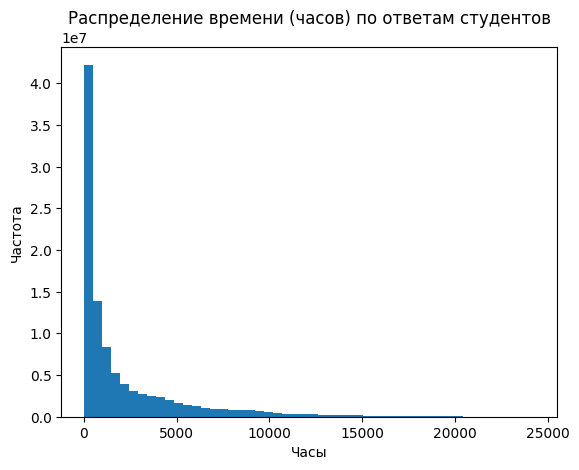

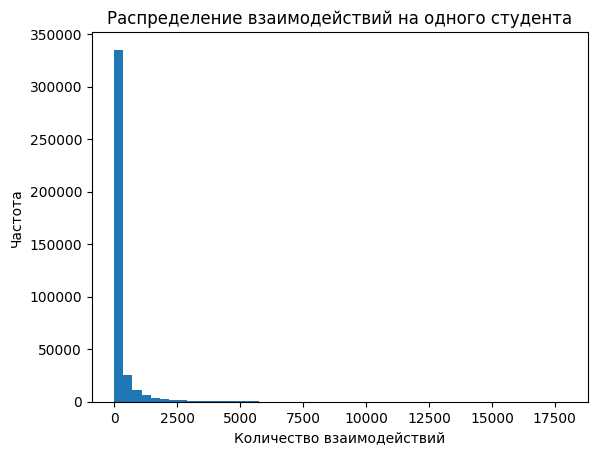

Количество вопросов: 13523
Количество лекций: 1959032
Количество лекций: 415
Средняя успеваемость (точность ответов): 0.66
Влияние объяснений на результат: prior_question_had_explanation
False    0.500629
True     0.673189
Name: answered_correctly, dtype: float64


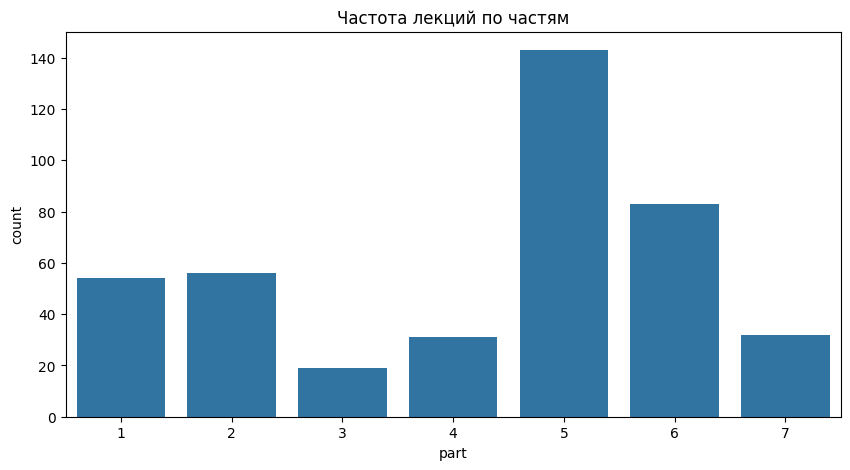

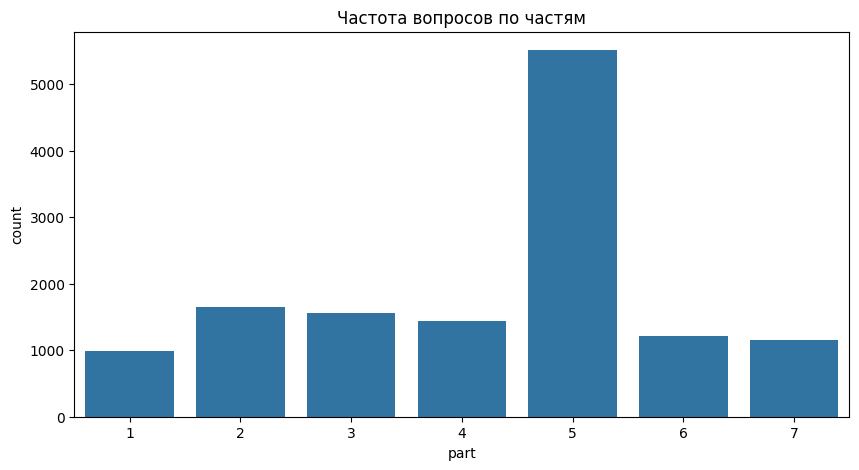

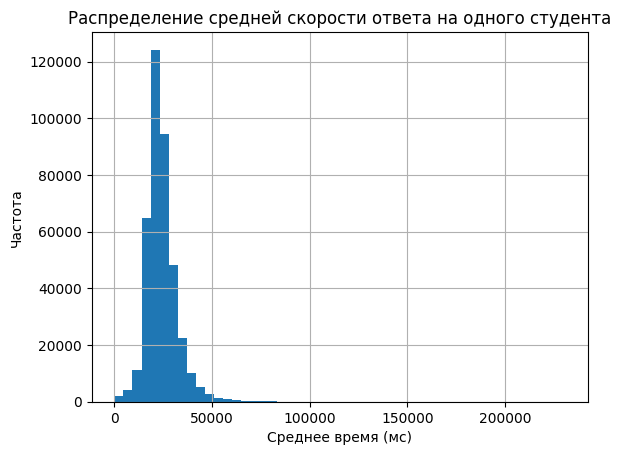

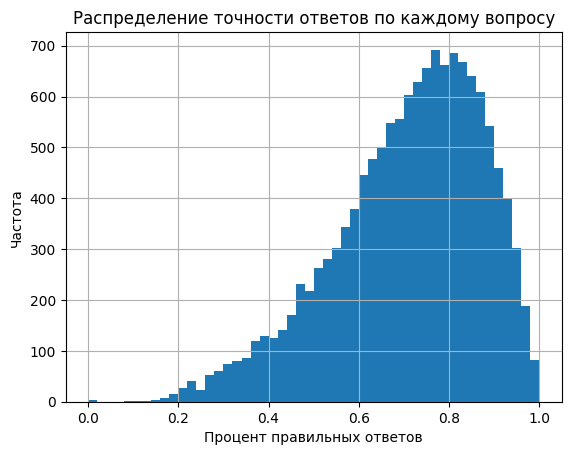

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train = pd.read_csv("train.csv")
lectures = pd.read_csv("lectures.csv")
questions = pd.read_csv("questions.csv")

# Подготовка данных
train['timestamp_hours'] = train['timestamp'] / (1000 * 60 * 60)  # Конвертация в часы
question_interactions = train[train['content_type_id'] == 0].copy()
question_interactions['prior_question_elapsed_time'] = question_interactions['prior_question_elapsed_time'].fillna(0)



# Проанализируйте время, затраченное студентами на ответы и выполнение задач.
train['timestamp_hours'] = train['timestamp'] / (1000 * 60 * 60)  # Конвертация в часы
plt.hist(train['timestamp_hours'], bins=50)
plt.title("Распределение времени (часов) по ответам студентов")
plt.xlabel("Часы")
plt.ylabel("Частота")
plt.show()

# Подсчитайте количество взаимодействий на одного студента и распределение этих взаимодействий.
user_interactions = train['user_id'].value_counts()
plt.hist(user_interactions, bins=50)
plt.title("Распределение взаимодействий на одного студента")
plt.xlabel("Количество взаимодействий")
plt.ylabel("Частота")
plt.show()


# Определите, какие контенты (вопросы или лекции) наиболее популярны.
question_interactions = train[train['content_type_id'] == 0]
lecture_interactions = train[train['content_type_id'] == 1]

print("Количество вопросов:", question_interactions['content_id'].nunique())
print("Количество лекций:", (train['content_type_id'] == 1).sum())
print("Количество лекций:", lecture_interactions['content_id'].nunique())


# Определите среднюю успеваемость.
accuracy = question_interactions['answered_correctly'].mean()
print(f"Средняя успеваемость (точность ответов): {accuracy:.2f}")


# Исследуйте, влияет ли дополнительное объяснение на результаты.
explanation_effect = question_interactions.groupby('prior_question_had_explanation')['answered_correctly'].mean()
print("Влияние объяснений на результат:", explanation_effect)



# Проанализируйте, какие категории лекций (part, tag) и их типы (type_of) встречаются чаще всего.
plt.figure(figsize=(10, 5))
sns.countplot(data=lectures, x="part")
plt.title("Частота лекций по частям")
plt.show()


# Проанализируйте, какие категории лекций (part, tag) и их типы (type_of) встречаются чаще всего.
plt.figure(figsize=(10, 5))
sns.countplot(data=questions, x="part")
plt.title("Частота вопросов по частям")
plt.show()


# Вычислите среднюю скорость ответа для каждого студента.
avg_time_per_user = question_interactions.groupby("user_id")['prior_question_elapsed_time'].mean()
avg_time_per_user.hist(bins=50)
plt.title("Распределение средней скорости ответа на одного студента")
plt.xlabel("Среднее время (мс)")
plt.ylabel("Частота")
plt.show()


# Процент правильных ответов на каждый вопрос:
question_accuracy = question_interactions.groupby("content_id")['answered_correctly'].mean()
question_accuracy.hist(bins=50)
plt.title("Распределение точности ответов по каждому вопросу")
plt.xlabel("Процент правильных ответов")
plt.ylabel("Частота")
plt.show()

